In [254]:
import pandas as pd
import numpy as np
import mlxtend

from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import train_test_split

import warnings

import seaborn as sns
# from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc



from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC


from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go






In [142]:
df_music_unmapped=pd.read_csv(r"G:\Classes\MachineLearning_TahlilDadeh\Session08\Session08_Files\df_with_label.csv",sep=",",encoding="UTF-8")
df_music_category=pd.read_csv(r"G:\Classes\MachineLearning_TahlilDadeh\Session08\Session08_Files\labels.csv",sep=",",encoding="UTF-8")


In [143]:
df_music_unmapped.rename(columns={"label": "labelid"}, inplace=True)
df_music_category.rename(columns={"label": "labelTitle","code":"labelid"}, inplace=True)

df_music_category["labelid"]=df_music_category.labelid.astype("Int64")
df_music_unmapped["labelid"]=df_music_unmapped.labelid.astype("Int64")

df_music_unmapped=df_music_unmapped.drop('Unnamed: 0', axis=1)

In [144]:
music_df = pd.merge(df_music_unmapped, df_music_category[['labelid', 'labelTitle']], on='labelid', how='inner')

In [145]:
print(music_df.head())

          0         1         2         3    4         5         6         7  \
0  0.000000  0.000000  1.893346  0.463756  0.0  0.000000  0.000000  1.330937   
1  1.024184  0.000000  0.920782  0.000000  0.0  0.055295  0.131389  0.949121   
2  0.748296  0.174042  1.560216  0.000000  0.0  0.000000  0.000000  0.176050   
3  0.212807  0.803298  0.961770  0.590599  0.0  1.410934  0.000000  0.483214   
4  1.389552  0.926537  1.047012  0.000000  0.0  0.792234  0.000000  1.406102   

     8    9  ...       504       505       506       507       508       509  \
0  0.0  0.0  ...  0.000000  0.000000  2.674875  0.000000  0.000000  0.956220   
1  0.0  0.0  ...  0.419429  2.027668  1.413473  0.101486  0.000000  0.173823   
2  0.0  0.0  ...  0.507238  0.152418  1.823126  0.192131  0.000000  1.047241   
3  0.0  0.0  ...  0.754443  1.033200  1.102041  1.703420  0.213729  0.000000   
4  0.0  0.0  ...  0.878271  0.000000  0.808179  0.000000  0.622847  0.267047   

        510       511  labelid    labe

##### SVM

In [92]:

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train = y_train
y_test = y_test

# Create and train the Perceptron model

svm=SVC(kernel="rbf",random_state=1,gamma=0.001,C=3,probability=True)
svm.fit(x_train, y_train)


# Evaluate the model
train_score = svm.score(x_train, y_train)
test_score = svm.score(x_test, y_test)

# Check the Score Result
print(f"Train data score: {train_score:.2f}")
print(f"Test  data score: {test_score :.2f}")

y_true = y_test
y_pred = svm.predict(x_test)

svm_score=round(test_score,2)
svm_precision = precision_score(y_true, y_pred, average='weighted')
svm_recall = recall_score(y_true, y_pred, average='weighted')
svm_f1score = f1_score(y_true, y_pred, average='weighted')

print(f"precision   : {svm_precision:.2f}")
print(f"recall (TPR): {svm_recall :.2f}")
print(f"f1score     : {svm_f1score :.2f}")

print()

print(classification_report(y_test,y_pred))

Train data score: 0.84
Test  data score: 0.55
precision   : 0.54
recall (TPR): 0.55
f1score     : 0.53

              precision    recall  f1-score   support

           0       0.47      0.24      0.32        29
           1       0.35      0.41      0.38        81
           2       0.47      0.70      0.56       128
           3       0.61      0.52      0.56        27
           4       0.39      0.37      0.38        38
           5       0.00      0.00      0.00         2
           6       0.46      0.60      0.52        10
           7       0.30      0.13      0.18        23
           8       0.61      0.58      0.60        53
           9       0.33      0.37      0.35        86
          10       0.81      0.81      0.81        26
          11       0.76      0.90      0.82        81
          12       0.00      0.00      0.00         9
          13       0.89      0.80      0.84        10
          14       0.70      0.50      0.58        14
          15       0.78      0.

C = 2 ---- gamma = 0.001 Score_train = 0.77
C = 2 ---- gamma = 0.001 Score_test  = 0.54

C = 3 ---- gamma = 0.001 Score_train = 0.84
C = 3 ---- gamma = 0.001 Score_test  = 0.55

C = 6 ---- gamma = 0.0009 Score_train = 0.93
C = 6 ---- gamma = 0.0009 Score_test  = 0.52

Best parameters:  {'C': 4, 'gamma': 0.001}
Best score:  0.5046701157920671




##### Create a list for gamma and C

In [ ]:
gamma = [i/1000 for i in range(1, 101)]
C = [i for i in range(1, 101)]
print(gamma)
print(C)

#####
##### find best gamma and c from given list for SVM
    using GridSearchCV 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')

df_music_unmapped=pd.read_csv(r"G:\Classes\MachineLearning_TahlilDadeh\Session08\Session08_Files\df_with_label.csv",sep=",",encoding="UTF-8")
df_music_category=pd.read_csv(r"G:\Classes\MachineLearning_TahlilDadeh\Session08\Session08_Files\labels.csv",sep=",",encoding="UTF-8")

df_music_unmapped.rename(columns={"label": "labelid"}, inplace=True)
df_music_category.rename(columns={"label": "labelTitle","code":"labelid"}, inplace=True)

df_music_category["labelid"]=df_music_category.labelid.astype("Int64")
df_music_unmapped["labelid"]=df_music_unmapped.labelid.astype("Int64")

df_music_unmapped=df_music_unmapped.drop('Unnamed: 0', axis=1)

music_df = pd.merge(df_music_unmapped, df_music_category[['labelid', 'labelTitle']], on='labelid', how='inner')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

param_grid = {'C': [i for i in range(1, 101)], 'gamma': [i/1000 for i in range(1, 101)]}

# Create the SVM model
svm = SVC(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

##### LogisticRegression

In [154]:
warnings.filterwarnings('ignore')
from sklearn.preprocessing import label_binarize

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Create and train the Logistic model
lr=LogisticRegression(random_state=1,max_iter=40,tol=0.0001, multi_class='ovr', solver='liblinear')
lr.fit(x_train, y_train)


# Evaluate the model
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

# Check the Score Result
print(f"Train data score: {train_score:.2f}")
print(f"Test data score: {test_score:.2f}")

y_true = y_test
y_pred = lr.predict(x_test)

lr_score=round(test_score,2)
lr_precision = precision_score(y_true, y_pred, average='weighted')
lr_recall = recall_score(y_true, y_pred, average='weighted')
lr_f1score = f1_score(y_true, y_pred, average='weighted')

print(f"precision   : {lr_precision:.2f}")
print(f"recall (TPR): {lr_recall :.2f}")
print(f"f1score     : {lr_f1score :.2f}")


print()

print(classification_report(y_test,y_pred))


Train data score: 0.98
Test data score: 0.47
precision   : 0.46
recall (TPR): 0.47
f1score     : 0.46

              precision    recall  f1-score   support

           0       0.28      0.24      0.26        29
           1       0.27      0.27      0.27        81
           2       0.44      0.56      0.50       128
           3       0.61      0.52      0.56        27
           4       0.34      0.37      0.35        38
           5       0.00      0.00      0.00         2
           6       0.40      0.40      0.40        10
           7       0.20      0.13      0.16        23
           8       0.45      0.57      0.50        53
           9       0.30      0.30      0.30        86
          10       0.82      0.69      0.75        26
          11       0.70      0.85      0.77        81
          12       0.00      0.00      0.00         9
          13       0.90      0.90      0.90        10
          14       0.78      0.50      0.61        14
          15       0.70      0.8

##### best hyper parameter for logistic regression

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Define the parameter grid
param_grid = {'max_iter': [i*100 for i in range (1,5)], 'tol': [0.001, 0.01, 0.1]}

# Create the logistic regression model
lr = LogisticRegression(random_state=1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_iter': 100, 'tol': 0.001}
Best score:  0.4566878541512688


##### KNN

In [90]:
warnings.filterwarnings('ignore')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)

print(f"train_score : {knn.score(x_train,y_train):.2f}")
print(f"test_score  : {knn.score(x_test,y_test):.2f}")

y_true = y_test
y_pred = svm.predict(x_test)

knn_precision = precision_score(y_true, y_pred, average='weighted')
knn_recall = recall_score(y_true, y_pred, average='weighted')
knn_f1score = f1_score(y_true, y_pred, average='weighted')

print(f"precision   : {knn_precision:.2f}")
print(f"recall (TPR): {knn_recall :.2f}")
print(f"f1score     : {knn_f1score :.2f}")


print()

print(classification_report(y_test,y_pred))



train_score : 0.52
test_score  : 0.45
precision   : 0.54
recall (TPR): 0.55
f1score     : 0.53

              precision    recall  f1-score   support

           0       0.47      0.24      0.32        29
           1       0.35      0.41      0.38        81
           2       0.47      0.70      0.56       128
           3       0.61      0.52      0.56        27
           4       0.39      0.37      0.38        38
           5       0.00      0.00      0.00         2
           6       0.46      0.60      0.52        10
           7       0.30      0.13      0.18        23
           8       0.61      0.58      0.60        53
           9       0.33      0.37      0.35        86
          10       0.81      0.81      0.81        26
          11       0.76      0.90      0.82        81
          12       0.00      0.00      0.00         9
          13       0.89      0.80      0.84        10
          14       0.70      0.50      0.58        14
          15       0.78      0.88      

##### Find Best K

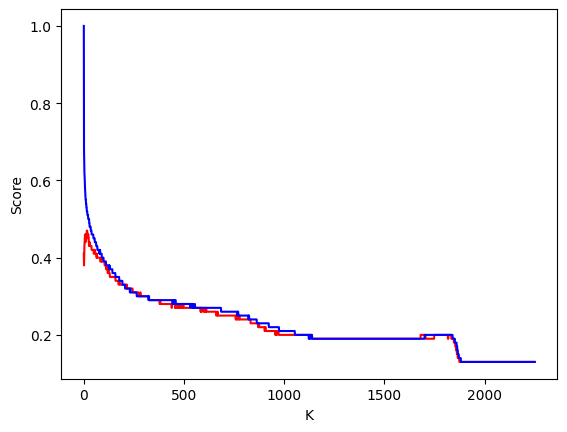

In [36]:
warnings.filterwarnings('ignore')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
mm = MinMaxScaler()
# x_train_sc = sc.fit_transform(x_train)
# x_test_sc = sc.transform(x_test)

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

train_score=[]
test_score=[]
for k in range(1,len(x_train)):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_score.append(round(knn.score(x_train,y_train),2))
    test_score.append(round(knn.score(x_test,y_test),2))
    
    
plt.plot(range(1,len(x_train)),test_score,color='r',label="test score")
plt.plot(range(1,len(x_train)),train_score,color='b',label="train score")
plt.ylabel("Score")
plt.xlabel("K")
plt.show()


In [55]:
df_scores = pd.DataFrame({'K': range(1, len(x_train)), 'Train Score': train_score, 'Test Score': test_score})

# Plot the scores using Plotly Express
fig = px.line(df_scores, x='K', y=['Train Score', 'Test Score'], title='KNN Model Scores')
fig.show()

##### Decision Tree

trainScore > 0.4180364282541093
test Score > 0.32538860103626943

              precision    recall  f1-score   support

           0       0.47      0.24      0.32        29
           1       0.35      0.41      0.38        81
           2       0.47      0.70      0.56       128
           3       0.61      0.52      0.56        27
           4       0.39      0.37      0.38        38
           5       0.00      0.00      0.00         2
           6       0.46      0.60      0.52        10
           7       0.30      0.13      0.18        23
           8       0.61      0.58      0.60        53
           9       0.33      0.37      0.35        86
          10       0.81      0.81      0.81        26
          11       0.76      0.90      0.82        81
          12       0.00      0.00      0.00         9
          13       0.89      0.80      0.84        10
          14       0.70      0.50      0.58        14
          15       0.78      0.88      0.82         8
          16   

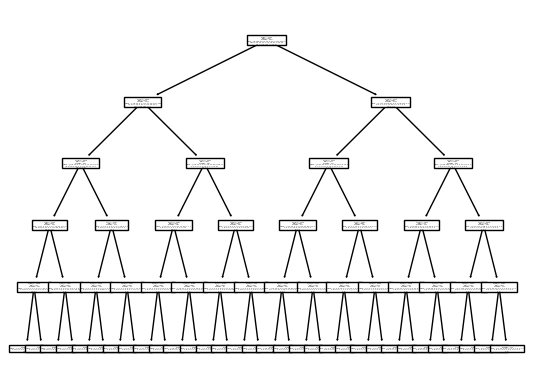

In [91]:
warnings.filterwarnings('ignore')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

dt=DecisionTreeClassifier(random_state=1,max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)


print("trainScore >",dt.score(x_train,y_train))
print("test Score >",dt.score(x_test,y_test))


print()

print(classification_report(y_test,y_pred))

plot_tree(dt)

plt.show()


##### find best hyper parameter

In [61]:
warnings.filterwarnings('ignore')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
mm = MinMaxScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15]
}
dt = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

dt_best = DecisionTreeClassifier(random_state=1, **best_params)
dt_best.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)





Best parameters:  {'max_depth': 5, 'min_samples_split': 2}
Best score:  0.3127617639812762


###### Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier


warnings.filterwarnings('ignore')

x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# split when minimum theres is 2 sample in leaf

# n_estimator : number of decision tree
# max_features : the percentage of feature that involved 
# min sample split : minimum sample of split that node must have to split
rf=RandomForestClassifier(n_estimators=1000,
                          max_features=0.8,
                          min_samples_split=100,
                          random_state=35,
                          max_samples=0.5)
rf.fit(x_train,y_train)


print("trainScore >",rf.score(x_train,y_train))
print("test Score >",rf.score(x_test,y_test))


print()

print(classification_report(y_test,y_pred))



trainScore > 0.45890715237672147
test Score > 0.3699481865284974


Train data score: 0.97
Test data score: 0.47
(965, 30)
(965, 30)


<Figure size 640x480 with 0 Axes>

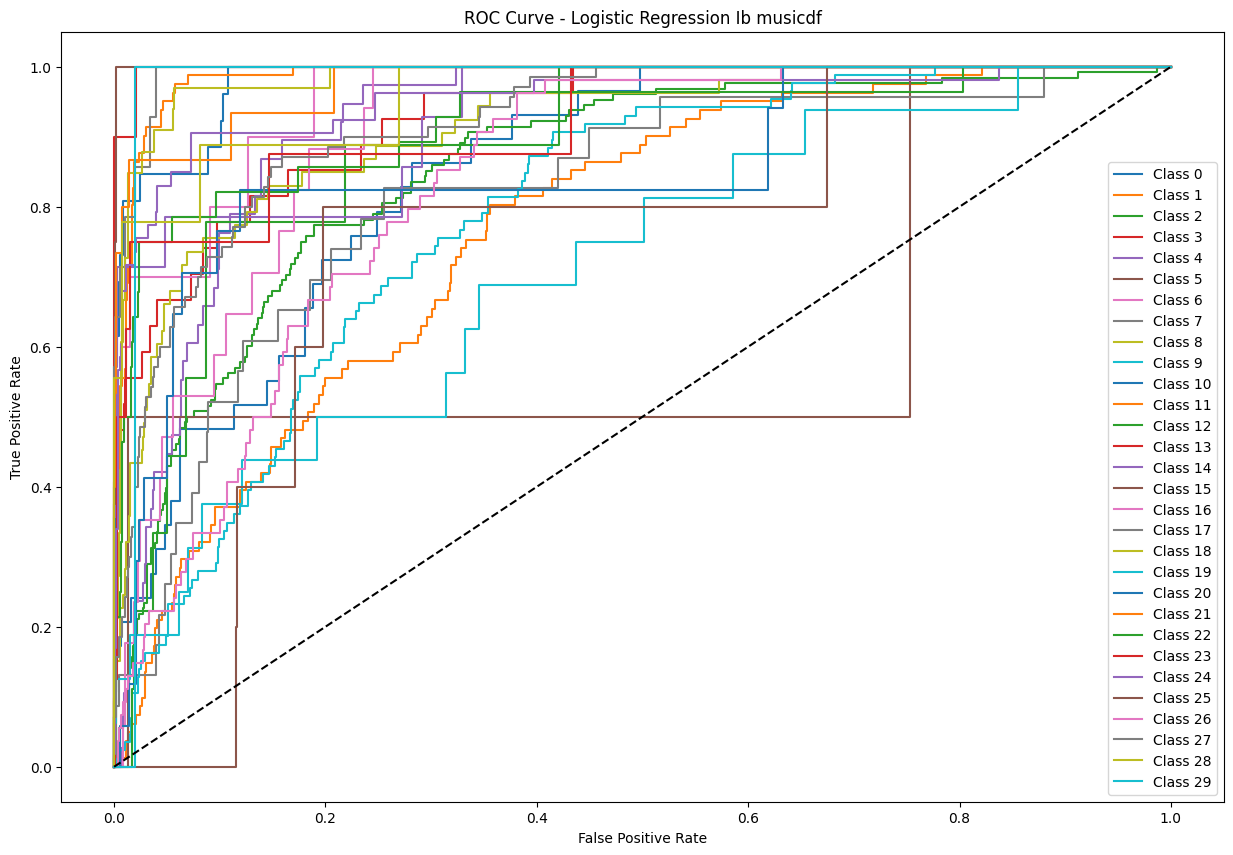

In [261]:

# y_true = y_test
# y_pred = lr.predict(x_test)

warnings.filterwarnings('ignore')


x = music_df.iloc[:,:-2]
y= music_df.iloc[:,-2].astype(int)


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Create and train the Logistic model
lr=LogisticRegression(random_state=1,max_iter=40,tol=0.0001,multi_class="ovr")
lr.fit(x_train, y_train)


# Evaluate the model
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

# Check the Score Result
print(f"Train data score: {train_score:.2f}")
print(f"Test data score: {test_score:.2f}")


# Get predicted probabilities
y_score = lr.predict_proba(x_test)

# Binarize the true labels
y_true = label_binarize(y_test, classes=y_test.unique())

print(y_score.shape)
print(y_true.shape)


# Calculate FPR, TPR, and thresholds for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(y_score.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_score[:, i], pos_label=i)

# Plot the ROC curve for each class
plt.figure()
plt.figure(figsize=(15,10))
for i in range(len(y_test.unique())):
    plt.plot(fpr[i], tpr[i], label='Class {}'.format(i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Ib musicdf')
plt.legend()
plt.show()
    

In [265]:
# Create a DataFrame for the ROC curve data
roc_data = []
for i in range(len(y_test.unique())):
    roc_data.extend(list(zip(fpr[i], tpr[i], [i] * len(fpr[i]))))
roc_df = pd.DataFrame(roc_data, columns=['False Positive Rate', 'True Positive Rate', 'Class'])

# Plot the ROC curve using Plotly Express
fig = px.scatter(roc_df, x='False Positive Rate', y='True Positive Rate', color='Class',
                 title='ROC Curve - Logistic Regression Ib musicdf', labels={'Class': 'Class'})
fig.add_shape(type='line', x0=0, y0=0, x1=1, y1=1, line=dict(color='black', dash='dash'))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

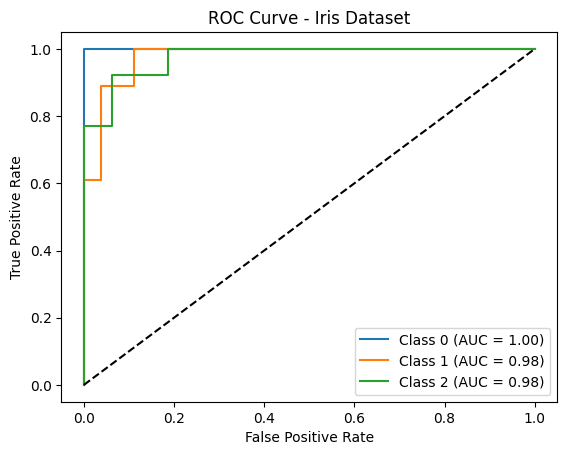

In [251]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the logistic regression model using the One-vs-Rest approach
lr = OneVsRestClassifier(LogisticRegression())
lr.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_score = lr.predict_proba(X_test)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc))

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Iris Dataset')
plt.legend(loc='lower right')
plt.show()